# Brain Tumor Classifier

#### What is a brain tumor?
A brain tumor is a collection, or mass, of abnormal cells in your brain. Your skull, which encloses your brain, is very rigid. Any growth inside such a restricted space can cause problems. Brain tumors can be cancerous (malignant) or noncancerous (benign). When benign or malignant tumors grow, they can cause the pressure inside your skull to increase. This can cause brain damage, and it can be life-threatening.

#### The importance of the subject
Early detection and classification of brain tumors is an important research domain in the field of medical imaging and accordingly helps in selecting the most convenient treatment method to save patients life therefore

#### Methods
The application of deep learning approaches in context to improve health diagnosis is providing impactful solutions. According to the World Health Organization (WHO), proper brain tumor diagnosis involves detection, brain tumor location identification, and classification of the tumor on the basis of malignancy, grade, and type. This experimental work in the diagnosis of brain tumors using Magnetic Resonance Imaging (MRI) involves detecting the tumor, classifying the tumor in terms of grade, type, and identification of tumor location. This method has experimented in terms of utilizing one model for classifying brain MRI on different classification tasks rather than an individual model for each classification task. The Convolutional Neural Network (CNN) based multi-task classification is equipped for the classification and detection of tumors. The identification of brain tumor location is also done using a CNN-based model by segmenting the brain tumor.


### The Objective:
We are gonna use Convolution Neural Network to predict the type of a brain tumor base on x rays pictures.

The dataset with the data is here: 
https://www.kaggle.com/masoudnickparvar/brain-tumor-mri-dataset



In [2]:
# Necessary imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Let's visualize the data.

In [3]:
data_dir = ('../input/brain-tumor-mri-dataset/Training')
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) 

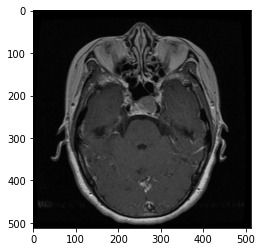

In [4]:
plt.imshow(img_array);

In [5]:
# The image shape.
img_array.shape

(512, 512, 3)

#### Ploting a image of each brain tumor type

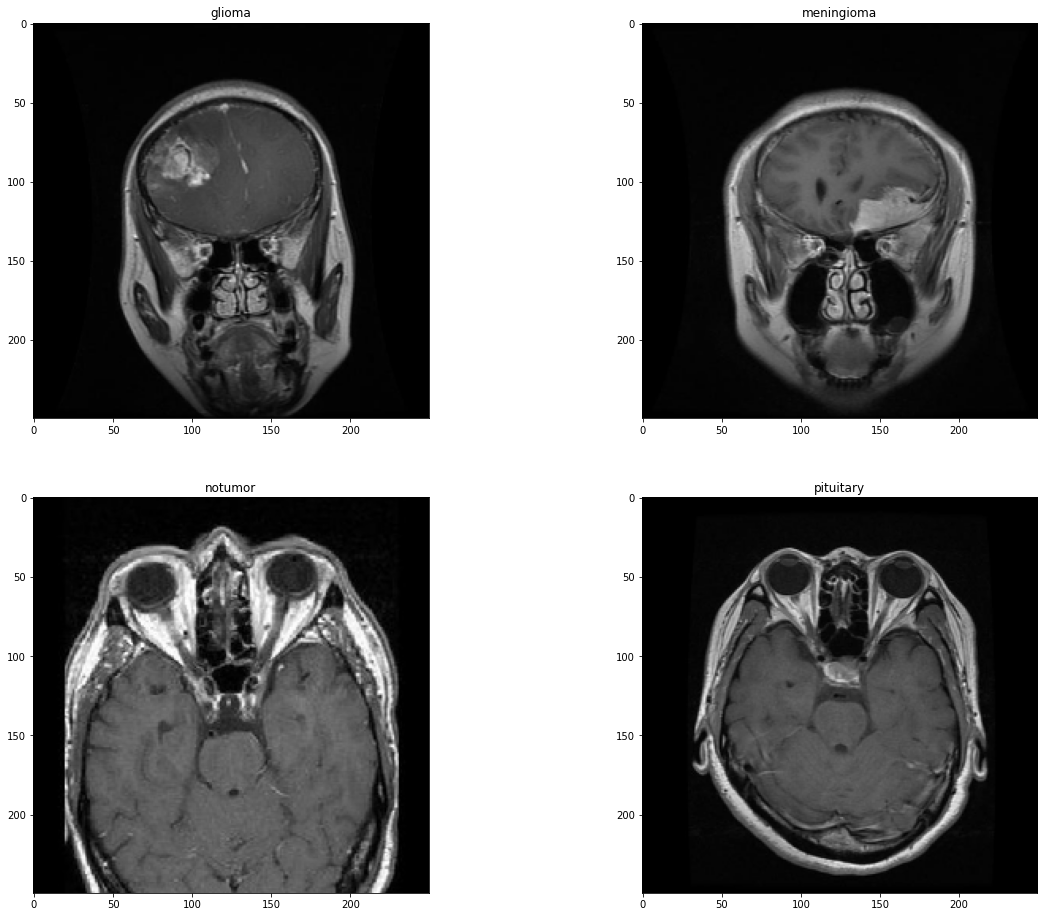

In [6]:
plt.figure(figsize=(20, 16))

images_path = ['/glioma/Tr-glTr_0000.jpg', '/meningioma/Tr-meTr_0000.jpg', '/notumor/Tr-noTr_0000.jpg', '/pituitary/Tr-piTr_0000.jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(data_dir + images_path[i])
    img = cv2.resize(img, (250, 250))
    plt.imshow(img)
    plt.title(categories[i])

# Modelling


# CNN - Model 1

In [16]:
# 96.95%

model1 = Sequential()

# Convolutional layer 1
model1.add(Conv2D(32,(3,3), input_shape=(64, 64, 1), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 2
model1.add(Conv2D(32,(3,3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())

# Neural network

model1.add(Dense(units= 252, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units=252, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units=4, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])



# using the ImageDataGenerator to prepare the images (Resize, nomalize, etc)

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False) 

generator_test = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

# Creating the train and test data.

train = generator_train.flow_from_directory('../input/brain-tumor-mri-dataset/Training', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('../input/brain-tumor-mri-dataset/Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


### Trainig model 1

In [17]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.

# Stop training if loss doesn't keep decreasing.
model1_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model1_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model1_mcp = ModelCheckpoint(filepath = 'model1_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

# Fiting the model.
history1 = model1.fit(train, steps_per_epoch=5712//32, epochs=100, validation_data=test, validation_steps= 1311//32,
                     callbacks=[model1_es, model1_rlr, model1_mcp])

Epoch 1/100
178/178 [==============================] - 20s 110ms/step - loss: 0.7969 - categorical_accuracy: 0.7275 - val_loss: 2.4731 - val_categorical_accuracy: 0.2883

Epoch 00001: val_loss improved from inf to 2.47315, saving model to model1_weights.h5
Epoch 2/100
178/178 [==============================] - 19s 105ms/step - loss: 0.4482 - categorical_accuracy: 0.8310 - val_loss: 1.0404 - val_categorical_accuracy: 0.6039

Epoch 00002: val_loss improved from 2.47315 to 1.04043, saving model to model1_weights.h5
Epoch 3/100
178/178 [==============================] - 19s 105ms/step - loss: 0.3508 - categorical_accuracy: 0.8678 - val_loss: 0.6835 - val_categorical_accuracy: 0.7516

Epoch 00003: val_loss improved from 1.04043 to 0.68346, saving model to model1_weights.h5
Epoch 4/100
178/178 [==============================] - 18s 102ms/step - loss: 0.2683 - categorical_accuracy: 0.8981 - val_loss: 0.2874 - val_categorical_accuracy: 0.8820

Epoch 00004: val_loss improved from 0.68346 to 0.2

In [18]:
model1.evaluate(test)

41/41 [==============================] - 3s 71ms/step - loss: 0.0802 - categorical_accuracy: 0.9840


[0.08015674352645874, 0.9839816689491272]

In [19]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)             

# Model 2

In [20]:

model2 = Sequential()

# Convolutional layer 1
model2.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model2.add(Conv2D(128,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model2.add(Conv2D(256,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model2.add(Conv2D(512,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(Flatten())

# Full connect layers

model2.add(Dense(units= 512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units=512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units=4, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])



In [21]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


train = generator_train.flow_from_directory('../input/brain-tumor-mri-dataset/Training', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('../input/brain-tumor-mri-dataset/Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')





Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


### Training model 2

In [22]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.

# Stop training if loss doesn't keep decreasing.
model2_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model2_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model2_mcp = ModelCheckpoint(filepath = 'model2_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)


# Fiting the model.
history2 = model2.fit(train, steps_per_epoch=5712//32, epochs=100, validation_data=test, validation_steps= 1311//32,
                      callbacks=[model2_es, model2_rlr, model2_mcp])

Epoch 1/100
178/178 [==============================] - 42s 111ms/step - loss: 1.4409 - categorical_accuracy: 0.6220 - val_loss: 2.1109 - val_categorical_accuracy: 0.2297

Epoch 00001: val_loss improved from inf to 2.11086, saving model to model2_weights.h5
Epoch 2/100
178/178 [==============================] - 20s 113ms/step - loss: 0.7155 - categorical_accuracy: 0.7324 - val_loss: 1.8617 - val_categorical_accuracy: 0.4070

Epoch 00002: val_loss improved from 2.11086 to 1.86169, saving model to model2_weights.h5
Epoch 3/100
178/178 [==============================] - 20s 112ms/step - loss: 0.5624 - categorical_accuracy: 0.7907 - val_loss: 0.6856 - val_categorical_accuracy: 0.7305

Epoch 00003: val_loss improved from 1.86169 to 0.68559, saving model to model2_weights.h5
Epoch 4/100
178/178 [==============================] - 19s 109ms/step - loss: 0.4700 - categorical_accuracy: 0.8245 - val_loss: 0.6451 - val_categorical_accuracy: 0.7359

Epoch 00004: val_loss improved from 0.68559 to 0.6

In [23]:
model2.evaluate(test)

41/41 [==============================] - 3s 81ms/step - loss: 0.0474 - categorical_accuracy: 0.9847


[0.04738914594054222, 0.9847444891929626]

In [24]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 64, 64, 64)        3200      
_________________________________________________________________
batch_normalization_10 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 128)       401536    
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 256)      

# Model 3

In [25]:
model3 = Sequential()

# Convolutional layer 1
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Flatten())

# Full connect layers

model3.add(Dense(units= 512, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=512, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=4, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model3.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])


In [26]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


train = generator_train.flow_from_directory('../input/brain-tumor-mri-dataset/Training', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('../input/brain-tumor-mri-dataset/Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [27]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.

# Stop training if loss doesn't keep decreasing.
model3_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model3_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model3_mcp = ModelCheckpoint(filepath = 'model3_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

# Fitting the model
history3 = model3.fit(train, steps_per_epoch=5712//32, epochs=100, validation_data=test, validation_steps= 1311//32,
                     callbacks=[model3_es, model3_rlr, model3_mcp])

Epoch 1/100
178/178 [==============================] - 21s 113ms/step - loss: 1.0154 - categorical_accuracy: 0.6630 - val_loss: 4.8549 - val_categorical_accuracy: 0.2289

Epoch 00001: val_loss improved from inf to 4.85487, saving model to model3_weights.h5
Epoch 2/100
178/178 [==============================] - 19s 107ms/step - loss: 0.5811 - categorical_accuracy: 0.7752 - val_loss: 1.0189 - val_categorical_accuracy: 0.6359

Epoch 00002: val_loss improved from 4.85487 to 1.01893, saving model to model3_weights.h5
Epoch 3/100
178/178 [==============================] - 19s 108ms/step - loss: 0.4571 - categorical_accuracy: 0.8264 - val_loss: 0.5547 - val_categorical_accuracy: 0.7437

Epoch 00003: val_loss improved from 1.01893 to 0.55472, saving model to model3_weights.h5
Epoch 4/100
178/178 [==============================] - 19s 107ms/step - loss: 0.3620 - categorical_accuracy: 0.8586 - val_loss: 0.4461 - val_categorical_accuracy: 0.8234

Epoch 00004: val_loss improved from 0.55472 to 0.4

In [28]:
model3.evaluate(test)

41/41 [==============================] - 3s 73ms/step - loss: 0.0755 - categorical_accuracy: 0.9901


[0.07545723766088486, 0.9900839328765869]

# Evaluating models 1, 2 and 3


Text(0.5, 1.0, 'Accuracy on Model_3 64 Filtters - 7x7 kernel - 3 Conv Layers')

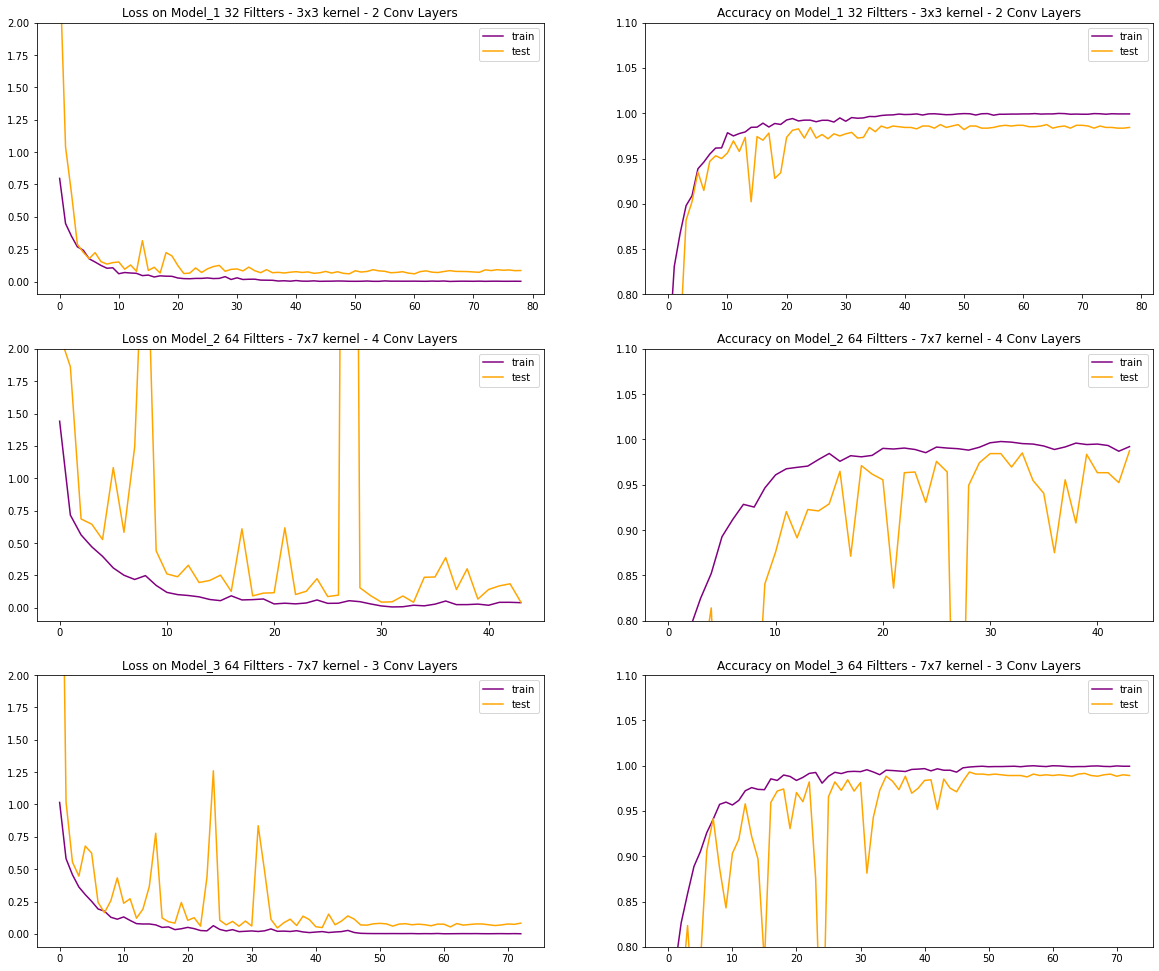

In [30]:
# Code for plotting
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, figsize=(20,17))

axs[0, 0].plot(history1.history["loss"],c = "purple")
axs[0, 0].plot(history1.history["val_loss"],c = "orange")
axs[0, 0].set_ylim([-0.1,2])
axs[0, 0].legend(["train", "test"])
axs[0, 0].set_title('Loss on Model_1 32 Filtters - 3x3 kernel - 2 Conv Layers')

axs[0, 1].plot(history1.history["categorical_accuracy"],c = "purple")
axs[0, 1].plot(history1.history["val_categorical_accuracy"],c = "orange")
axs[0, 1].set_ylim([0.8,1.1])
axs[0, 1].legend(["train", "test"])
axs[0, 1].set_title('Accuracy on Model_1 32 Filtters - 3x3 kernel - 2 Conv Layers')

axs[1, 0].plot(history2.history["loss"],c = "purple")
axs[1, 0].plot(history2.history["val_loss"],c = "orange")
axs[1, 0].set_ylim([-0.1,2])
axs[1, 0].legend(["train", "test"])
axs[1, 0].set_title('Loss on Model_2 64 Filtters - 7x7 kernel - 4 Conv Layers')

axs[1, 1].plot(history2.history["categorical_accuracy"],c = "purple")
axs[1, 1].plot(history2.history["val_categorical_accuracy"],c = "orange")
axs[1, 1].set_ylim([0.8,1.1])
axs[1, 1].legend(["train", "test"])
axs[1, 1].set_title('Accuracy on Model_2 64 Filtters - 7x7 kernel - 4 Conv Layers')

axs[2, 0].plot(history3.history["loss"],c = "purple")
axs[2, 0].plot(history3.history["val_loss"],c = "orange")
axs[2, 0].set_ylim([-0.1,2])
axs[2, 0].legend(["train", "test"])
axs[2, 0].set_title('Loss on Model_3 64 Filtters - 7x7 kernel - 3 Conv Layers')

axs[2, 1].plot(history3.history["categorical_accuracy"],c = "purple")
axs[2, 1].plot(history3.history["val_categorical_accuracy"],c = "orange")
axs[2, 1].set_ylim([0.8,1.1])
axs[2, 1].legend(["train", "test"])
axs[2, 1].set_title('Accuracy on Model_3 64 Filtters - 7x7 kernel - 3 Conv Layers')

In [31]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 64, 64, 64)        3200      
_________________________________________________________________
batch_normalization_14 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        200768    
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)       

In [32]:
model3.evaluate(test)

41/41 [==============================] - 3s 73ms/step - loss: 0.0624 - categorical_accuracy: 0.9901


[0.06238746643066406, 0.9900839328765869]

# Making changes on new models
I will change the number of Conv layers, FC layers, optmizer and input_shape.

## Model 4

In [33]:
model4 = Sequential()

# Convolutional layer 1
model4.add(Conv2D(64,(7,7), input_shape=(200, 200, 1), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model4.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model4.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model4.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model4.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 6
model4.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Flatten())

# Full connect layers

model4.add(Dense(units= 1024, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(units=1024, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(units=4, activation='softmax'))



model4.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [34]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)



train = generator_train.flow_from_directory('../input/brain-tumor-mri-dataset/Training', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('../input/brain-tumor-mri-dataset/Testing', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [35]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.

# Stop training if loss doesn't keep decreasing.
model4_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model4_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)


# Automatically saves the best weights of the model, based on best val_accuracy
model4_mcp = ModelCheckpoint(filepath = 'model4_weights.h5', monitor = 'val_accuracy_score', 
                      save_best_only = True, verbose = 1)

history4 = model4.fit(train, steps_per_epoch=5712//32, epochs=100, validation_data=test, validation_steps= 1311//32,
                     callbacks=[model4_es, model4_rlr, model4_mcp])

Epoch 1/100
178/178 [==============================] - 29s 147ms/step - loss: 0.7473 - categorical_accuracy: 0.7248 - val_loss: 1.7448 - val_categorical_accuracy: 0.2297

Epoch 00001: val_loss improved from inf to 1.74482, saving model to model4_weights.h5
Epoch 2/100
178/178 [==============================] - 25s 140ms/step - loss: 0.4499 - categorical_accuracy: 0.8289 - val_loss: 1.5423 - val_categorical_accuracy: 0.3422

Epoch 00002: val_loss improved from 1.74482 to 1.54227, saving model to model4_weights.h5
Epoch 3/100
178/178 [==============================] - 25s 141ms/step - loss: 0.3485 - categorical_accuracy: 0.8614 - val_loss: 0.5660 - val_categorical_accuracy: 0.7789

Epoch 00003: val_loss improved from 1.54227 to 0.56596, saving model to model4_weights.h5
Epoch 4/100
178/178 [==============================] - 24s 136ms/step - loss: 0.2792 - categorical_accuracy: 0.8952 - val_loss: 0.3484 - val_categorical_accuracy: 0.8523

Epoch 00004: val_loss improved from 0.56596 to 0.3

In [36]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 200, 200, 64)      3200      
_________________________________________________________________
batch_normalization_17 (Batc (None, 200, 200, 64)      256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 100, 100, 128)     401536    
_________________________________________________________________
batch_normalization_18 (Batc (None, 100, 100, 128)     512       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 50, 50, 128)      

In [37]:
model4.evaluate(test)

41/41 [==============================] - 5s 119ms/step - loss: 0.0560 - categorical_accuracy: 0.9870


[0.05596091225743294, 0.9870327711105347]

## Model 5

In [53]:
model5 = Sequential()

# Convolutional layer 1
model5.add(Conv2D(64,(7,7), input_shape=(200, 200, 1), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model5.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model5.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model5.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model5.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 6
model5.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

model5.add(Flatten())

# Full connect layers

model5.add(Dense(units= 1024, activation='relu'))
model5.add(Dropout(0.25))
model5.add(Dense(units=512, activation='relu'))
model5.add(Dropout(0.25))
model5.add(Dense(units=4, activation='softmax'))



model5.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [54]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)



train = generator_train.flow_from_directory('../input/brain-tumor-mri-dataset/Training', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('../input/brain-tumor-mri-dataset/Testing', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [55]:
model5_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model5_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)
model5_mcp = ModelCheckpoint(filepath = 'model5_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

history5 = model5.fit(train, steps_per_epoch=5712//32, epochs=100, validation_data=test, validation_steps= 1311//32,
                     callbacks=[model5_es, model5_rlr, model5_mcp])

Epoch 1/100
178/178 [==============================] - 26s 141ms/step - loss: 0.7072 - categorical_accuracy: 0.7350 - val_loss: 1.4038 - val_categorical_accuracy: 0.3117

Epoch 00001: val_categorical_accuracy improved from -inf to 0.31172, saving model to model5_weights.h5
Epoch 2/100
178/178 [==============================] - 25s 138ms/step - loss: 0.4086 - categorical_accuracy: 0.8408 - val_loss: 1.9549 - val_categorical_accuracy: 0.2852

Epoch 00002: val_categorical_accuracy did not improve from 0.31172
Epoch 3/100
178/178 [==============================] - 25s 139ms/step - loss: 0.3280 - categorical_accuracy: 0.8799 - val_loss: 0.8351 - val_categorical_accuracy: 0.6484

Epoch 00003: val_categorical_accuracy improved from 0.31172 to 0.64844, saving model to model5_weights.h5
Epoch 4/100
178/178 [==============================] - 24s 135ms/step - loss: 0.2455 - categorical_accuracy: 0.9118 - val_loss: 0.3215 - val_categorical_accuracy: 0.8687

Epoch 00004: val_categorical_accuracy im

In [43]:
model5.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 200, 200, 64)      3200      
_________________________________________________________________
batch_normalization_28 (Batc (None, 200, 200, 64)      256       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 100, 100, 128)     401536    
_________________________________________________________________
batch_normalization_29 (Batc (None, 100, 100, 128)     512       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 50, 50, 128)      

In [56]:
model5.evaluate(test)

41/41 [==============================] - 4s 89ms/step - loss: 0.0534 - categorical_accuracy: 0.9863


[0.05336887016892433, 0.986270010471344]

## Model 6

In [45]:
model6 = Sequential()

# Convolutional layer 1
model6.add(Conv2D(64,(7,7), input_shape=(200, 200, 1), padding='same', activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model6.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model6.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model6.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model6.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 6
model6.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))

model6.add(Flatten())

# Full connect layers

model6.add(Dense(units= 1024, activation='relu'))
model6.add(Dropout(0.25))
model6.add(Dense(units=1024, activation='relu'))
model6.add(Dropout(0.25))
model6.add(Dense(units=512, activation='relu'))
model6.add(Dropout(0.2))
model6.add(Dense(units=4, activation='softmax'))



model6.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [46]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


train = generator_train.flow_from_directory('../input/brain-tumor-mri-dataset/Training', target_size=(200, 200,),
                                              batch_size=64, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('../input/brain-tumor-mri-dataset/Testing', target_size=(200, 200,),
                                              batch_size=64, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [48]:
model6_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model6_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)
model6_mcp = ModelCheckpoint(filepath = 'model6_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)


history6 = model6.fit(train, steps_per_epoch=5712//64, epochs=100, validation_data=test, validation_steps= 1311//64,
                     callbacks=[model6_es, model6_rlr, model6_mcp])

Epoch 1/100
89/89 [==============================] - 23s 260ms/step - loss: 0.4392 - categorical_accuracy: 0.8366 - val_loss: 1.7125 - val_categorical_accuracy: 0.2406

Epoch 00001: val_categorical_accuracy improved from -inf to 0.24062, saving model to model6_weights.h5
Epoch 2/100
89/89 [==============================] - 24s 264ms/step - loss: 0.3964 - categorical_accuracy: 0.8516 - val_loss: 1.6209 - val_categorical_accuracy: 0.4125

Epoch 00002: val_categorical_accuracy improved from 0.24062 to 0.41250, saving model to model6_weights.h5
Epoch 3/100
89/89 [==============================] - 24s 265ms/step - loss: 0.3198 - categorical_accuracy: 0.8808 - val_loss: 1.2894 - val_categorical_accuracy: 0.4625

Epoch 00003: val_categorical_accuracy improved from 0.41250 to 0.46250, saving model to model6_weights.h5
Epoch 4/100
89/89 [==============================] - 23s 261ms/step - loss: 0.2783 - categorical_accuracy: 0.8962 - val_loss: 0.9714 - val_categorical_accuracy: 0.6250

Epoch 000

In [49]:
model6.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 200, 200, 64)      3200      
_________________________________________________________________
batch_normalization_34 (Batc (None, 200, 200, 64)      256       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 100, 100, 128)     401536    
_________________________________________________________________
batch_normalization_35 (Batc (None, 100, 100, 128)     512       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 50, 50, 128)     

In [50]:
model6.evaluate(test)

21/21 [==============================] - 3s 152ms/step - loss: 0.0686 - categorical_accuracy: 0.9802


[0.06855832040309906, 0.980167806148529]

## Evaluating models 4, 5 and 6

Text(0.5, 1.0, 'Accuracy on Model_6 64 Filtters - 7x7 kernel - 6 Conv Layers, 3 FC and Batch 64')

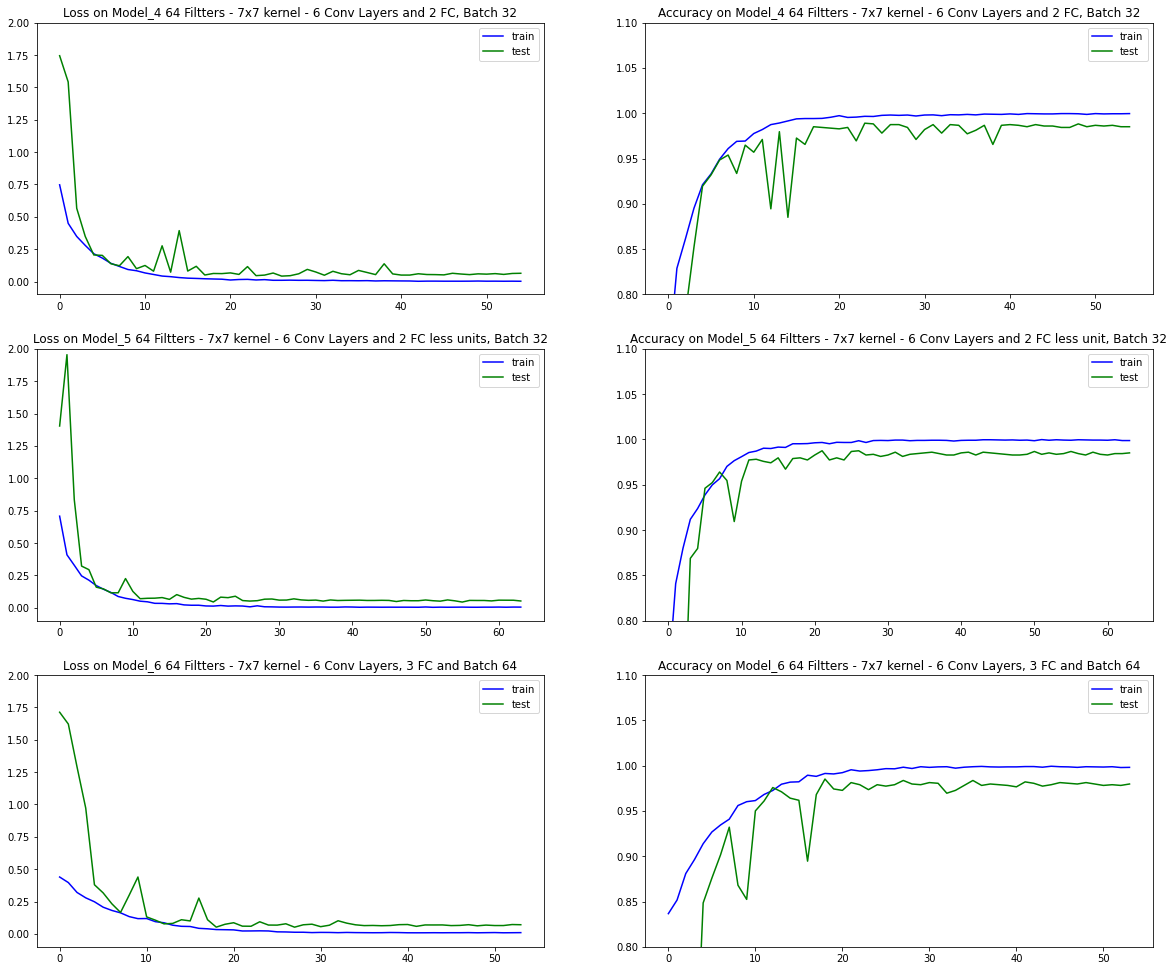

In [59]:
# Code for plotting
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, figsize=(20,17))

axs[0, 0].plot(history4.history["loss"],c = "blue")
axs[0, 0].plot(history4.history["val_loss"],c = "green")
axs[0, 0].set_ylim([-0.1,2])
axs[0, 0].legend(["train", "test"])
axs[0, 0].set_title('Loss on Model_4 64 Filtters - 7x7 kernel - 6 Conv Layers and 2 FC, Batch 32')

axs[0, 1].plot(history4.history["categorical_accuracy"],c = "blue")
axs[0, 1].plot(history4.history["val_categorical_accuracy"],c = "green")
axs[0, 1].set_ylim([0.8,1.1])
axs[0, 1].legend(["train", "test"])
axs[0, 1].set_title('Accuracy on Model_4 64 Filtters - 7x7 kernel - 6 Conv Layers and 2 FC, Batch 32')

axs[1, 0].plot(history5.history["loss"],c = "blue")
axs[1, 0].plot(history5.history["val_loss"],c = "green")
axs[1, 0].set_ylim([-0.1,2])
axs[1, 0].legend(["train", "test"])
axs[1, 0].set_title('Loss on Model_5 64 Filtters - 7x7 kernel - 6 Conv Layers and 2 FC less units, Batch 32')

axs[1, 1].plot(history5.history["categorical_accuracy"],c = "blue")
axs[1, 1].plot(history5.history["val_categorical_accuracy"],c = "green")
axs[1, 1].set_ylim([0.8,1.1])
axs[1, 1].legend(["train", "test"])
axs[1, 1].set_title('Accuracy on Model_5 64 Filtters - 7x7 kernel - 6 Conv Layers and 2 FC less unit, Batch 32')

axs[2, 0].plot(history6.history["loss"],c = "blue")
axs[2, 0].plot(history6.history["val_loss"],c = "green")
axs[2, 0].set_ylim([-0.1,2])
axs[2, 0].legend(["train", "test"])
axs[2, 0].set_title('Loss on Model_6 64 Filtters - 7x7 kernel - 6 Conv Layers, 3 FC and Batch 64')

axs[2, 1].plot(history6.history["categorical_accuracy"],c = "blue")
axs[2, 1].plot(history6.history["val_categorical_accuracy"],c = "green")
axs[2, 1].set_ylim([0.8,1.1])
axs[2, 1].legend(["train", "test"])
axs[2, 1].set_title('Accuracy on Model_6 64 Filtters - 7x7 kernel - 6 Conv Layers, 3 FC and Batch 64')

# Conclusion:
Model 5 pleased me a lot.
Not too complex and not too simple either.
We avoid underfitting and overfitting with a smooth process.

I will save model 5 for now and I will continue to testing and working on this data.

In [52]:
# Saving the model
model5_json = model5.to_json()
with open('classifier_brain_tumor.json', 'w') as json_file:
    json_file.write(model5_json)
    
# Saving the best weights was already save on the training process through callback.
    
    
    